In [2]:
import pandas as pd # Library for data handling
import numpy as np # matrix operations
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sb
plt.rcParams['figure.figsize'] = (20, 12)

# ETL (Extract, Transform, Load)

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/ruhidm/Palette_training_4/main/USA_honey_production.csv')

In [4]:
df.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626 entries, 0 to 625
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   state        626 non-null    object 
 1   numcol       626 non-null    float64
 2   yieldpercol  626 non-null    int64  
 3   totalprod    626 non-null    float64
 4   stocks       626 non-null    float64
 5   priceperlb   626 non-null    float64
 6   prodvalue    626 non-null    float64
 7   year         626 non-null    int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 39.2+ KB


In [6]:
df['numcol']=df['numcol'].astype('int')
df['state']=df['state'].astype('string')
df['yieldpercol'] = df['yieldpercol'].astype('float')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626 entries, 0 to 625
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   state        626 non-null    string 
 1   numcol       626 non-null    int64  
 2   yieldpercol  626 non-null    float64
 3   totalprod    626 non-null    float64
 4   stocks       626 non-null    float64
 5   priceperlb   626 non-null    float64
 6   prodvalue    626 non-null    float64
 7   year         626 non-null    int64  
dtypes: float64(5), int64(2), string(1)
memory usage: 39.2 KB


In [8]:
gdf = gpd.read_file('/Users/ruhidmirzayev/Desktop/USA_States/USA_States.shp')

In [9]:
gdf.head()

,STATE_NAME,STATE_FIPS,STATE_ABBR,geometry
0,Washington,53,WA,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628..."
1,Montana,30,MT,"POLYGON ((-111.47543 44.70216, -111.48080 44.6..."
2,Maine,23,ME,"MULTIPOLYGON (((-69.77728 44.07415, -69.85993 ..."
3,North Dakota,38,ND,"POLYGON ((-98.73044 45.93827, -99.00683 45.939..."
4,South Dakota,46,SD,"POLYGON ((-102.78838 42.99530, -103.00588 42.9..."


In [10]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   STATE_NAME  51 non-null     object  
 1   STATE_FIPS  51 non-null     object  
 2   STATE_ABBR  51 non-null     object  
 3   geometry    51 non-null     geometry
dtypes: geometry(1), object(3)
memory usage: 1.7+ KB


In [11]:
gdf['STATE_NAME']=gdf['STATE_NAME'].astype('string')
gdf['STATE_ABBR']=gdf['STATE_ABBR'].astype('string')

In [12]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   STATE_NAME  51 non-null     string  
 1   STATE_FIPS  51 non-null     object  
 2   STATE_ABBR  51 non-null     string  
 3   geometry    51 non-null     geometry
dtypes: geometry(1), object(1), string(2)
memory usage: 1.7+ KB


In [13]:
gdf.explore(
    column='STATE_FIPS',
    cmap='Blues'
)

# EDA(Explarotary Data Analysis)

## Renaming

In [14]:
df.rename(columns=
{
    'state': 'State',
    'numcol': 'NumCol',
    'yieldpercol': 'YieldPerCol',
    'totalprod': 'TotalProd',
    'stocks':'Stocks',
    'priceperlb': 'PricePerIb',
    'prodvalue': 'ProdValue',
    'year':'Year'
}, inplace=True)

In [15]:
gdf.rename(columns=
{
    'STATE_ABBR': 'State',
    'STATE_NAME': 'Name'
}, inplace=True)

## Checking Null Values

In [16]:
df.isna()

,State,NumCol,YieldPerCol,TotalProd,Stocks,PricePerIb,ProdValue,Year
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
621,False,False,False,False,False,False,False,False
622,False,False,False,False,False,False,False,False
623,False,False,False,False,False,False,False,False
624,False,False,False,False,False,False,False,False


In [17]:
df.isna().sum()

State          0
NumCol         0
YieldPerCol    0
TotalProd      0
Stocks         0
PricePerIb     0
ProdValue      0
Year           0
dtype: int64

## Checking Duplicated Values

In [18]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
621    False
622    False
623    False
624    False
625    False
Length: 626, dtype: bool

In [19]:
df.duplicated().sum()

0

## Checking Unique Values

In [20]:
df['State'].unique() # Series

<StringArray>
['AL', 'AZ', 'AR', 'CA', 'CO', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS',
 'KY', 'LA', 'ME', 'MD', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NJ', 'NM',
 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA',
 'WA', 'WV', 'WI', 'WY', 'SC']
Length: 44, dtype: string

In [21]:
print('The number of unique states are: ', df['State'].nunique()) # Why 44

The number of unique states are:  44


In [23]:
df.groupby('State')\
    .mean()\
       .reset_index() 

,State,NumCol,YieldPerCol,TotalProd,Stocks,PricePerIb,ProdValue,Year
0,AL,11933.333333,67.533333,8.254667e+05,1.588000e+05,1.418667,1.001933e+06,2005.0
1,AR,36800.000000,73.933333,2.810400e+06,9.926667e+05,1.092000,2.684400e+06,2005.0
2,AZ,33666.666667,60.066667,2.032267e+06,8.770000e+05,1.134667,2.111800e+06,2005.0
3,CA,406666.666667,55.800000,2.316900e+07,6.453800e+06,1.133333,2.435933e+07,2005.0
4,CO,28000.000000,62.800000,1.750600e+06,8.152667e+05,1.229333,2.090267e+06,2005.0
5,FL,195200.000000,83.066667,1.646987e+07,2.209600e+06,1.100667,1.661527e+07,2005.0
6,GA,60400.000000,54.666667,3.299933e+06,3.522667e+05,1.185333,3.867533e+06,2005.0
7,HI,8733.333333,98.000000,8.431333e+05,1.702000e+05,1.710000,1.404200e+06,2005.0
8,IA,31466.666667,65.733333,2.080000e+06,1.129933e+06,1.320667,2.588333e+06,2005.0
9,ID,99400.000000,44.000000,4.410667e+06,1.875933e+06,1.138000,4.762067e+06,2005.0


In [24]:
pd.merge(
    df.groupby('State')\
    .mean()\
       .reset_index(),
    gdf,
    on='State'
)

,State,NumCol,YieldPerCol,TotalProd,Stocks,PricePerIb,ProdValue,Year,Name,STATE_FIPS,geometry
0,AL,11933.333333,67.533333,8.254667e+05,1.588000e+05,1.418667,1.001933e+06,2005.0,Alabama,01,"POLYGON ((-85.07007 31.98070, -85.11515 31.907..."
1,AR,36800.000000,73.933333,2.810400e+06,9.926667e+05,1.092000,2.684400e+06,2005.0,Arkansas,05,"POLYGON ((-94.46169 34.19677, -94.45262 34.508..."
2,AZ,33666.666667,60.066667,2.032267e+06,8.770000e+05,1.134667,2.111800e+06,2005.0,Arizona,04,"POLYGON ((-114.52063 33.02771, -114.55909 33.0..."
3,CA,406666.666667,55.800000,2.316900e+07,6.453800e+06,1.133333,2.435933e+07,2005.0,California,06,"MULTIPOLYGON (((-121.66522 38.16929, -121.7823..."
4,CO,28000.000000,62.800000,1.750600e+06,8.152667e+05,1.229333,2.090267e+06,2005.0,Colorado,08,"POLYGON ((-102.04446 37.64147, -102.04201 37.3..."
5,FL,195200.000000,83.066667,1.646987e+07,2.209600e+06,1.100667,1.661527e+07,2005.0,Florida,12,"MULTIPOLYGON (((-80.78566 28.78519, -80.76242 ..."
6,GA,60400.000000,54.666667,3.299933e+06,3.522667e+05,1.185333,3.867533e+06,2005.0,Georgia,13,"MULTIPOLYGON (((-85.13016 31.77885, -85.13156 ..."
7,HI,8733.333333,98.000000,8.431333e+05,1.702000e+05,1.710000,1.404200e+06,2005.0,Hawaii,15,"MULTIPOLYGON (((-159.33797 21.95150, -159.4423..."
8,IA,31466.666667,65.733333,2.080000e+06,1.129933e+06,1.320667,2.588333e+06,2005.0,Iowa,19,"POLYGON ((-91.12013 40.70544, -91.12930 40.682..."
9,ID,99400.000000,44.000000,4.410667e+06,1.875933e+06,1.138000,4.762067e+06,2005.0,Idaho,16,"POLYGON ((-117.02630 43.67903, -117.02379 43.7..."


In [25]:
gpd.GeoDataFrame(pd.merge(
    df.groupby('State')\
    .mean()\
       .reset_index(),
    gdf,
    on='State'
)).explore(
    column='PricePerIb'
)

In [26]:
gpd.GeoDataFrame(pd.merge(
    df.groupby('State')\
    .mean()\
       .reset_index(),
    gdf,
    on='State'
)).explore(
    column='YieldPerCol',
    cmap='rainbow_r'
)

In [27]:
df.groupby('State').mean() # 13 years average

,NumCol,YieldPerCol,TotalProd,Stocks,PricePerIb,ProdValue,Year
State,,,,,,,
AL,11933.333333,67.533333,8.254667e+05,1.588000e+05,1.418667,1.001933e+06,2005.0
AR,36800.000000,73.933333,2.810400e+06,9.926667e+05,1.092000,2.684400e+06,2005.0
AZ,33666.666667,60.066667,2.032267e+06,8.770000e+05,1.134667,2.111800e+06,2005.0
CA,406666.666667,55.800000,2.316900e+07,6.453800e+06,1.133333,2.435933e+07,2005.0
CO,28000.000000,62.800000,1.750600e+06,8.152667e+05,1.229333,2.090267e+06,2005.0
FL,195200.000000,83.066667,1.646987e+07,2.209600e+06,1.100667,1.661527e+07,2005.0
GA,60400.000000,54.666667,3.299933e+06,3.522667e+05,1.185333,3.867533e+06,2005.0
HI,8733.333333,98.000000,8.431333e+05,1.702000e+05,1.710000,1.404200e+06,2005.0
IA,31466.666667,65.733333,2.080000e+06,1.129933e+06,1.320667,2.588333e+06,2005.0


In [28]:
df.groupby('State')['YieldPerCol'].mean()\
    .sort_values() # 13 years average

State
ME    31.066667
NJ    36.933333
VA    40.200000
ID    44.000000
OR    44.400000
MD    45.000000
NV    45.181818
OK    46.333333
UT    46.533333
NC    47.800000
WV    48.533333
WA    48.800000
PA    50.400000
KY    52.133333
MO    53.400000
NM    53.866667
GA    54.666667
CA    55.800000
KS    56.066667
TN    56.333333
AZ    60.066667
IN    60.933333
IL    61.666667
CO    62.800000
OH    63.533333
IA    65.733333
WY    66.133333
VT    66.933333
NE    67.466667
AL    67.533333
SC    68.000000
MI    68.133333
NY    69.133333
TX    70.533333
AR    73.933333
MN    74.266667
SD    75.800000
MT    77.333333
WI    79.400000
FL    83.066667
MS    87.466667
ND    88.066667
LA    95.733333
HI    98.000000
Name: YieldPerCol, dtype: float64

In [29]:
df.groupby('State')['YieldPerCol'].mean()\
    .sort_values() # 13 years average

State
ME    31.066667
NJ    36.933333
VA    40.200000
ID    44.000000
OR    44.400000
MD    45.000000
NV    45.181818
OK    46.333333
UT    46.533333
NC    47.800000
WV    48.533333
WA    48.800000
PA    50.400000
KY    52.133333
MO    53.400000
NM    53.866667
GA    54.666667
CA    55.800000
KS    56.066667
TN    56.333333
AZ    60.066667
IN    60.933333
IL    61.666667
CO    62.800000
OH    63.533333
IA    65.733333
WY    66.133333
VT    66.933333
NE    67.466667
AL    67.533333
SC    68.000000
MI    68.133333
NY    69.133333
TX    70.533333
AR    73.933333
MN    74.266667
SD    75.800000
MT    77.333333
WI    79.400000
FL    83.066667
MS    87.466667
ND    88.066667
LA    95.733333
HI    98.000000
Name: YieldPerCol, dtype: float64

<AxesSubplot:xlabel='State'>

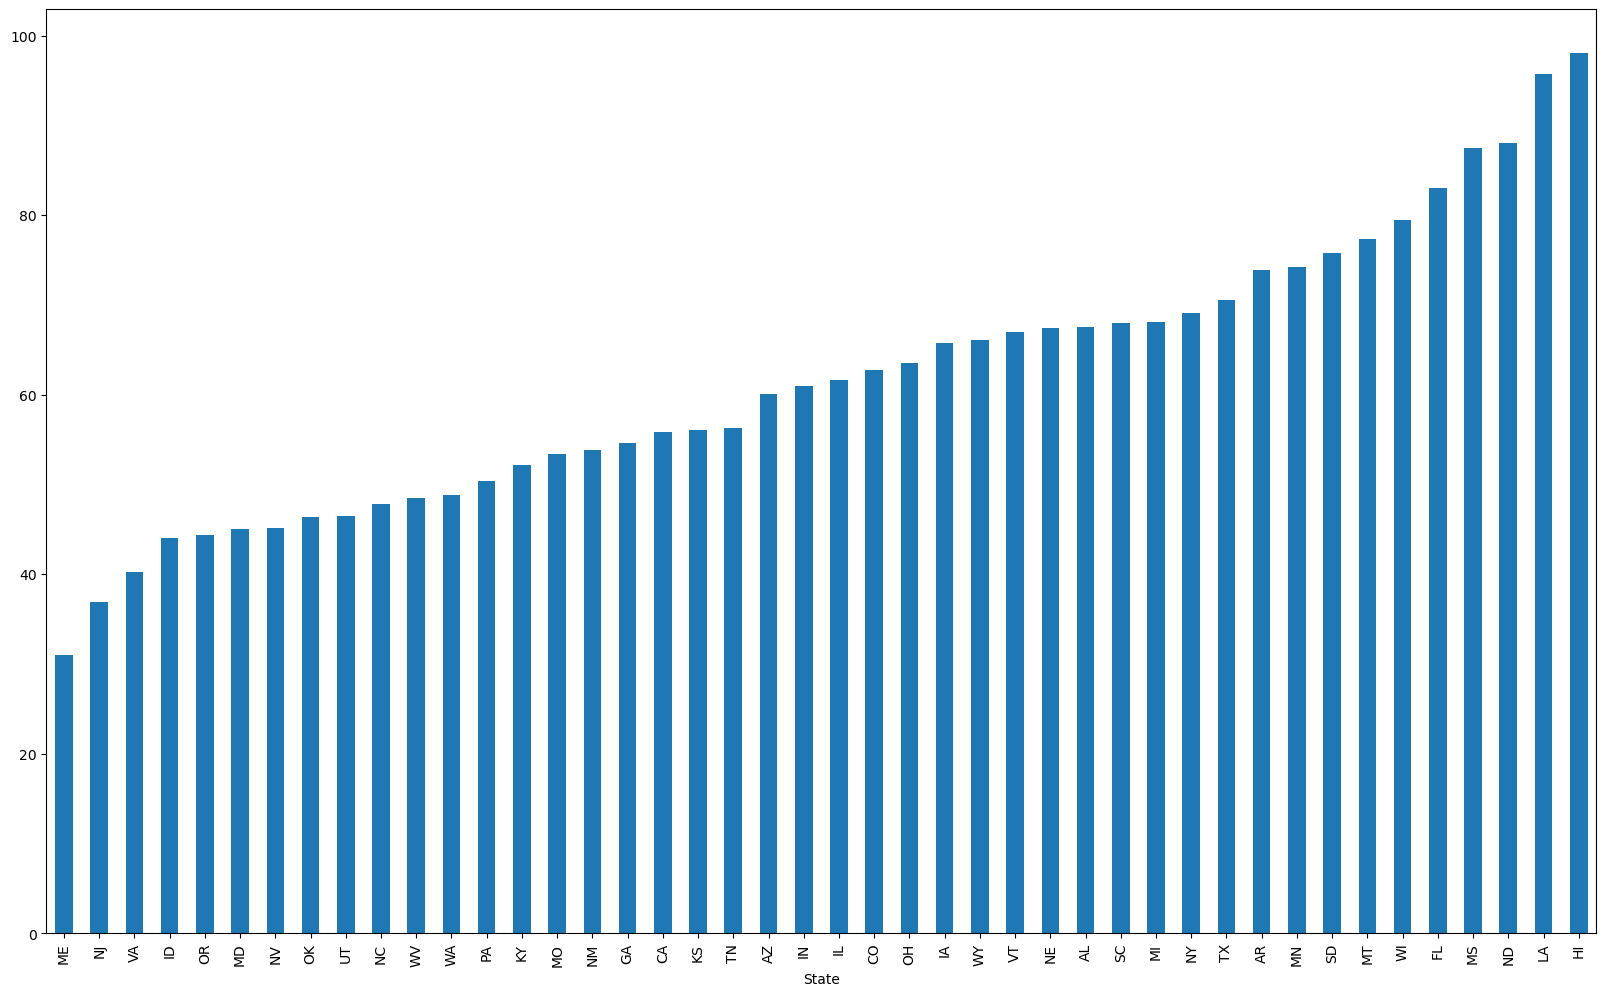

In [30]:
df.groupby('State')['YieldPerCol'].mean()\
    .sort_values()\
        .plot(kind='bar')

In [31]:
plt.style.use('seaborn-whitegrid')

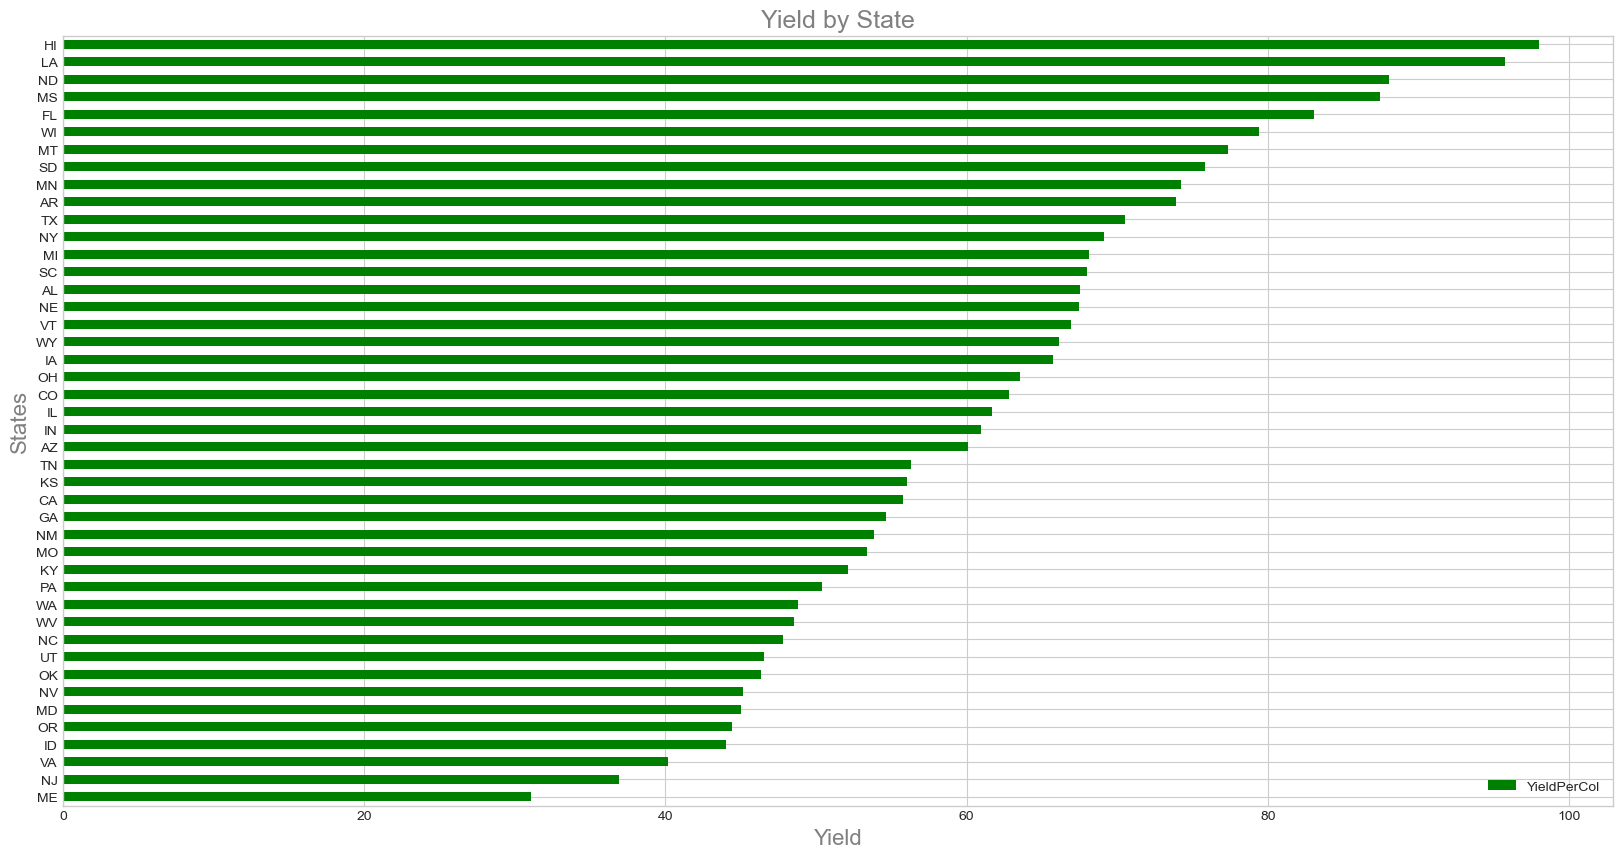

In [32]:
df.groupby('State')['YieldPerCol'].mean()\
    .sort_values()\
        .plot(
            kind='barh', 
            figsize=(20,10),
            color='green')
plt.title(
    'Yield by State', 
    size=18,
    color='gray')
plt.xlabel(
    'Yield',
    color='gray',
    size=16)
plt.ylabel(
    'States',
    color='gray',
    size=16)
plt.legend()
plt.show()

In [33]:
df_y=df.groupby('State')['YieldPerCol'].mean()\
    .sort_values()\
        .to_frame()\
            .reset_index()

In [34]:
df_y

,State,YieldPerCol
0,ME,31.066667
1,NJ,36.933333
2,VA,40.200000
3,ID,44.000000
4,OR,44.400000
5,MD,45.000000
6,NV,45.181818
7,OK,46.333333
8,UT,46.533333
9,NC,47.800000


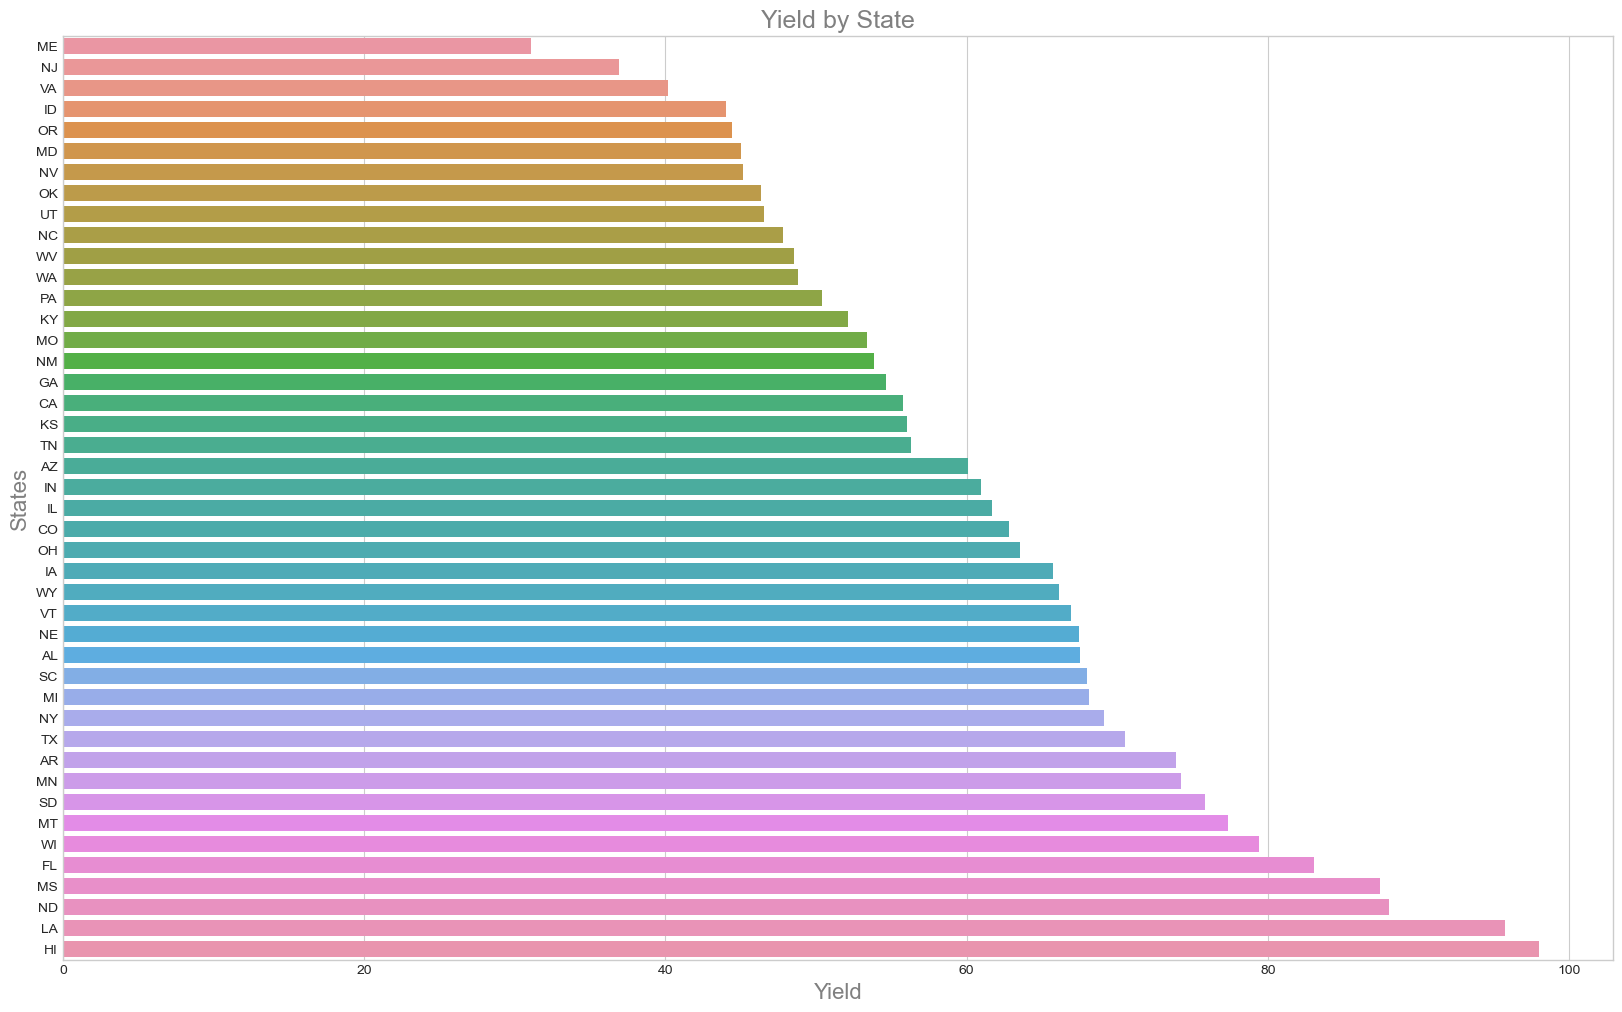

In [35]:
sb.barplot(
    x= df_y['YieldPerCol'],
    y = df_y['State'],
    )
plt.title(
    'Yield by State', 
    size=18,
    color='gray')
plt.xlabel(
    'Yield',
    color='gray',
    size=16)
plt.ylabel(
    'States',
    color='gray',
    size=16)

plt.show()

# Feature Selection

<AxesSubplot:>

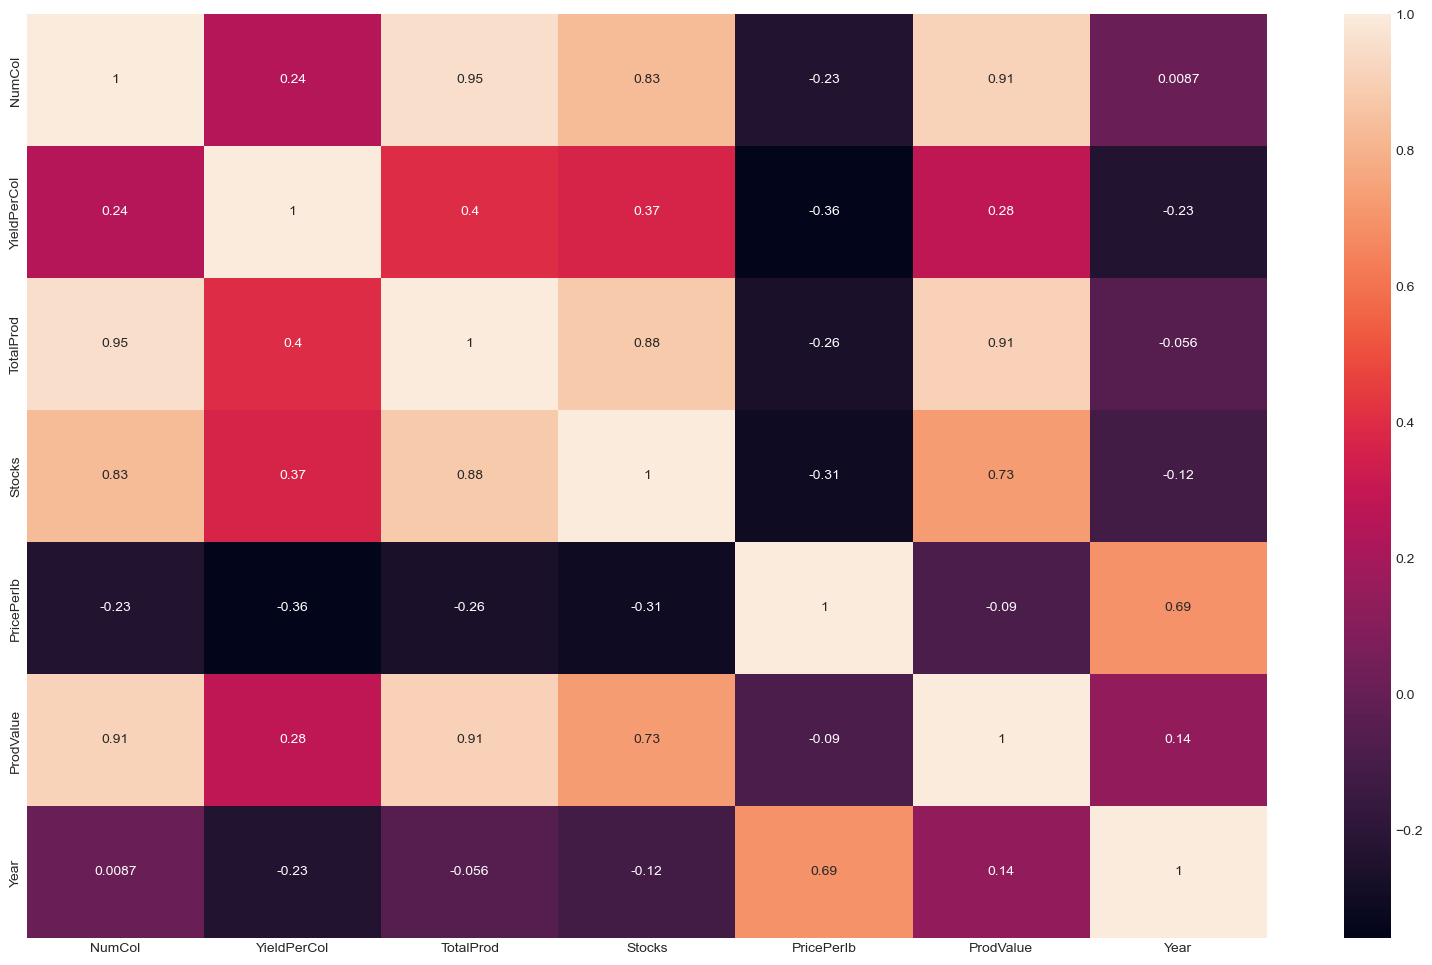

In [39]:
sb.heatmap(
    df.corr(),
    annot=True)


In [40]:
df

,State,NumCol,YieldPerCol,TotalProd,Stocks,PricePerIb,ProdValue,Year
0,AL,16000,71.0,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000,60.0,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000,65.0,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000,83.0,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000,72.0,1944000.0,1594000.0,0.70,1361000.0,1998
...,...,...,...,...,...,...,...,...
621,VA,4000,41.0,164000.0,23000.0,3.77,618000.0,2012
622,WA,62000,41.0,2542000.0,1017000.0,2.38,6050000.0,2012
623,WV,6000,48.0,288000.0,95000.0,2.91,838000.0,2012
624,WI,60000,69.0,4140000.0,1863000.0,2.05,8487000.0,2012


In [ ]:
# Cluster Yield Mean and Yield STD


<AxesSubplot:xlabel='Year'>

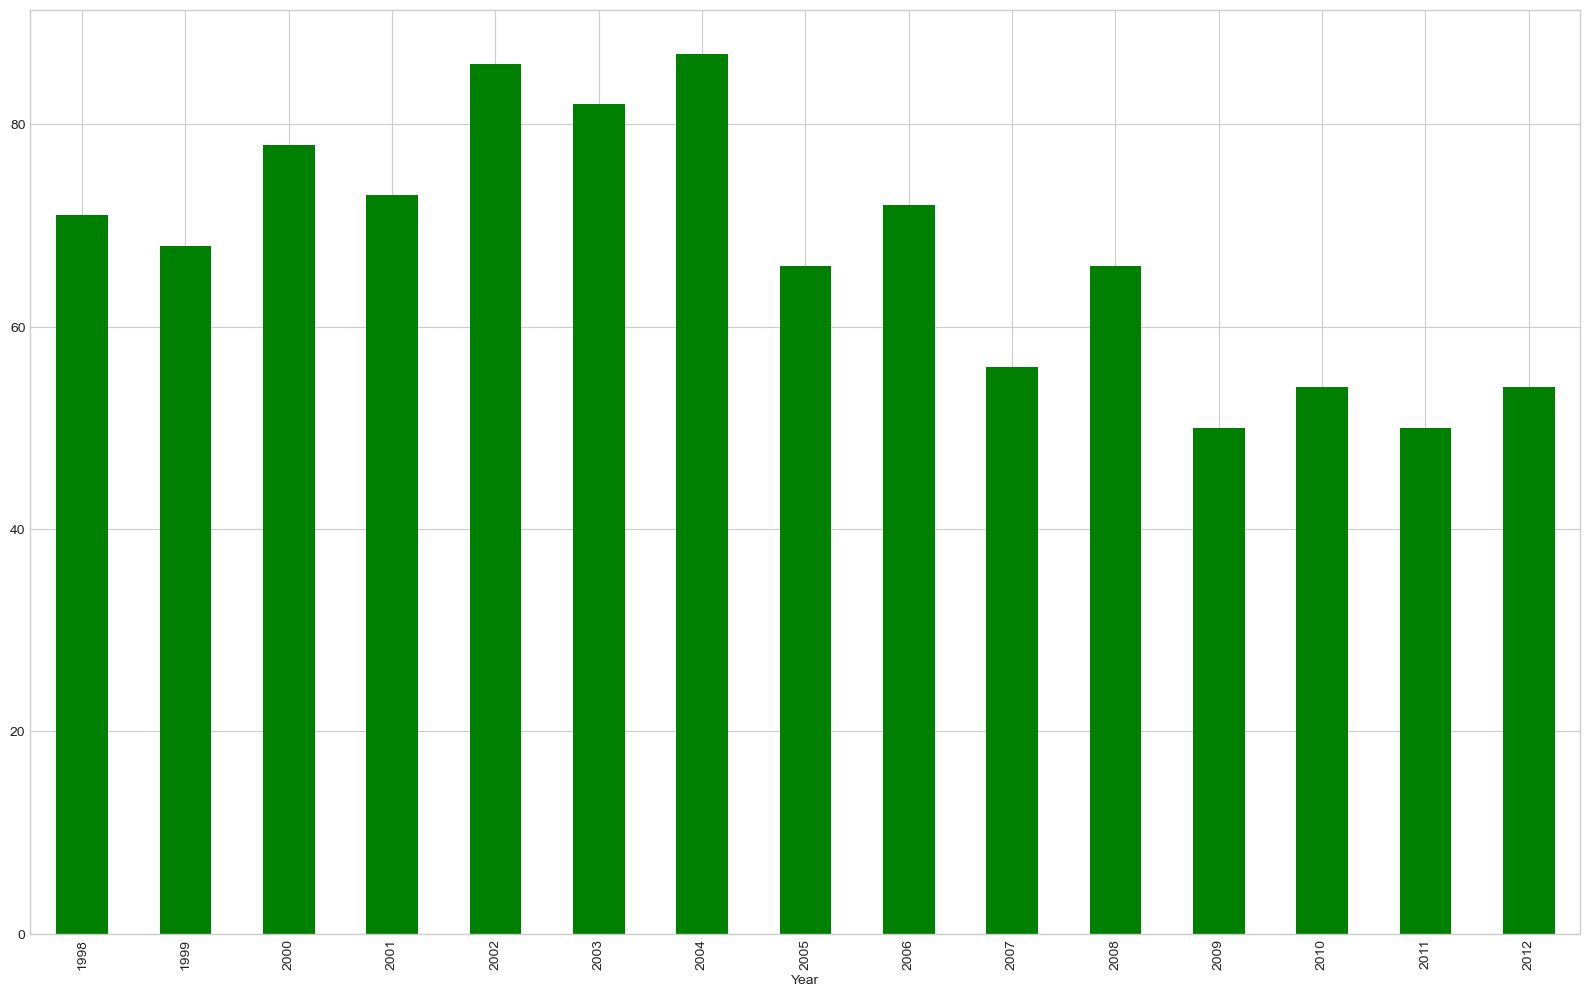

In [53]:
df.loc[df['State']=='AL'].set_index('Year')['YieldPerCol'].plot(
    kind='bar',
    color='green')

In [65]:
df_mean=df.groupby(['State'])['YieldPerCol'].mean()\
    .to_frame()

In [64]:
df_std=df.groupby(['State'])['YieldPerCol'].std()\
    .to_frame()

<AxesSubplot:xlabel='Year'>

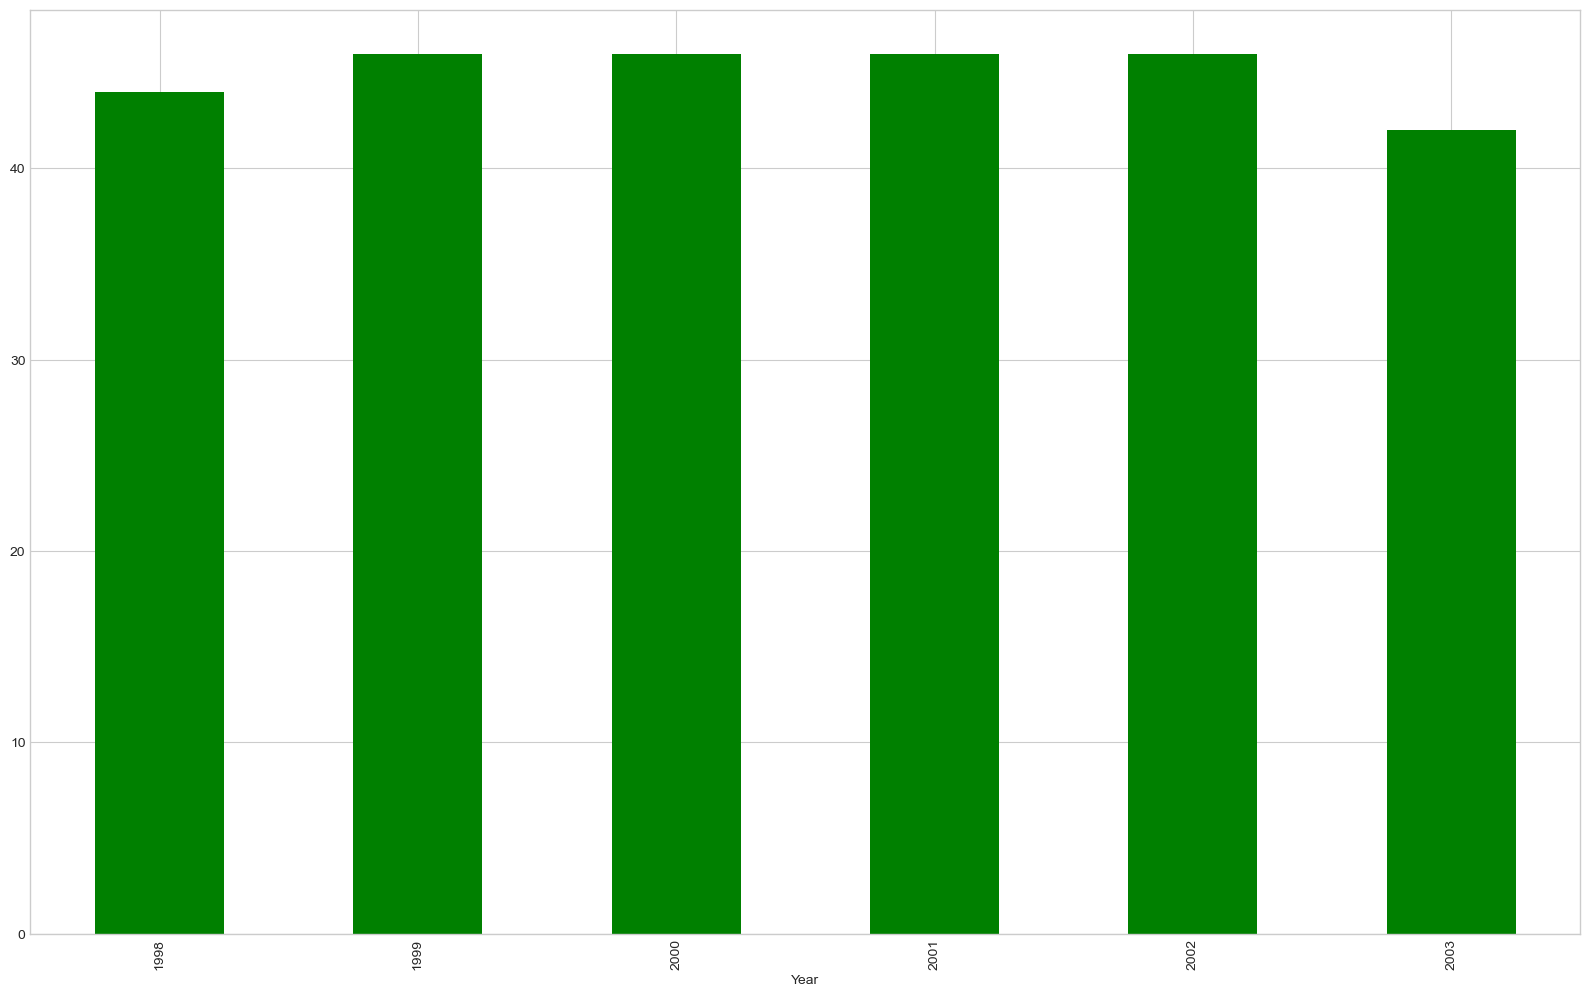

In [58]:
df.loc[df['State']=='MD'].set_index('Year')['YieldPerCol'].plot(
    kind='bar',
    color='green')

In [60]:
df.loc[df['State']=='MD']['Year'].unique()

array([1998, 1999, 2000, 2001, 2002, 2003])

<AxesSubplot:xlabel='Year'>

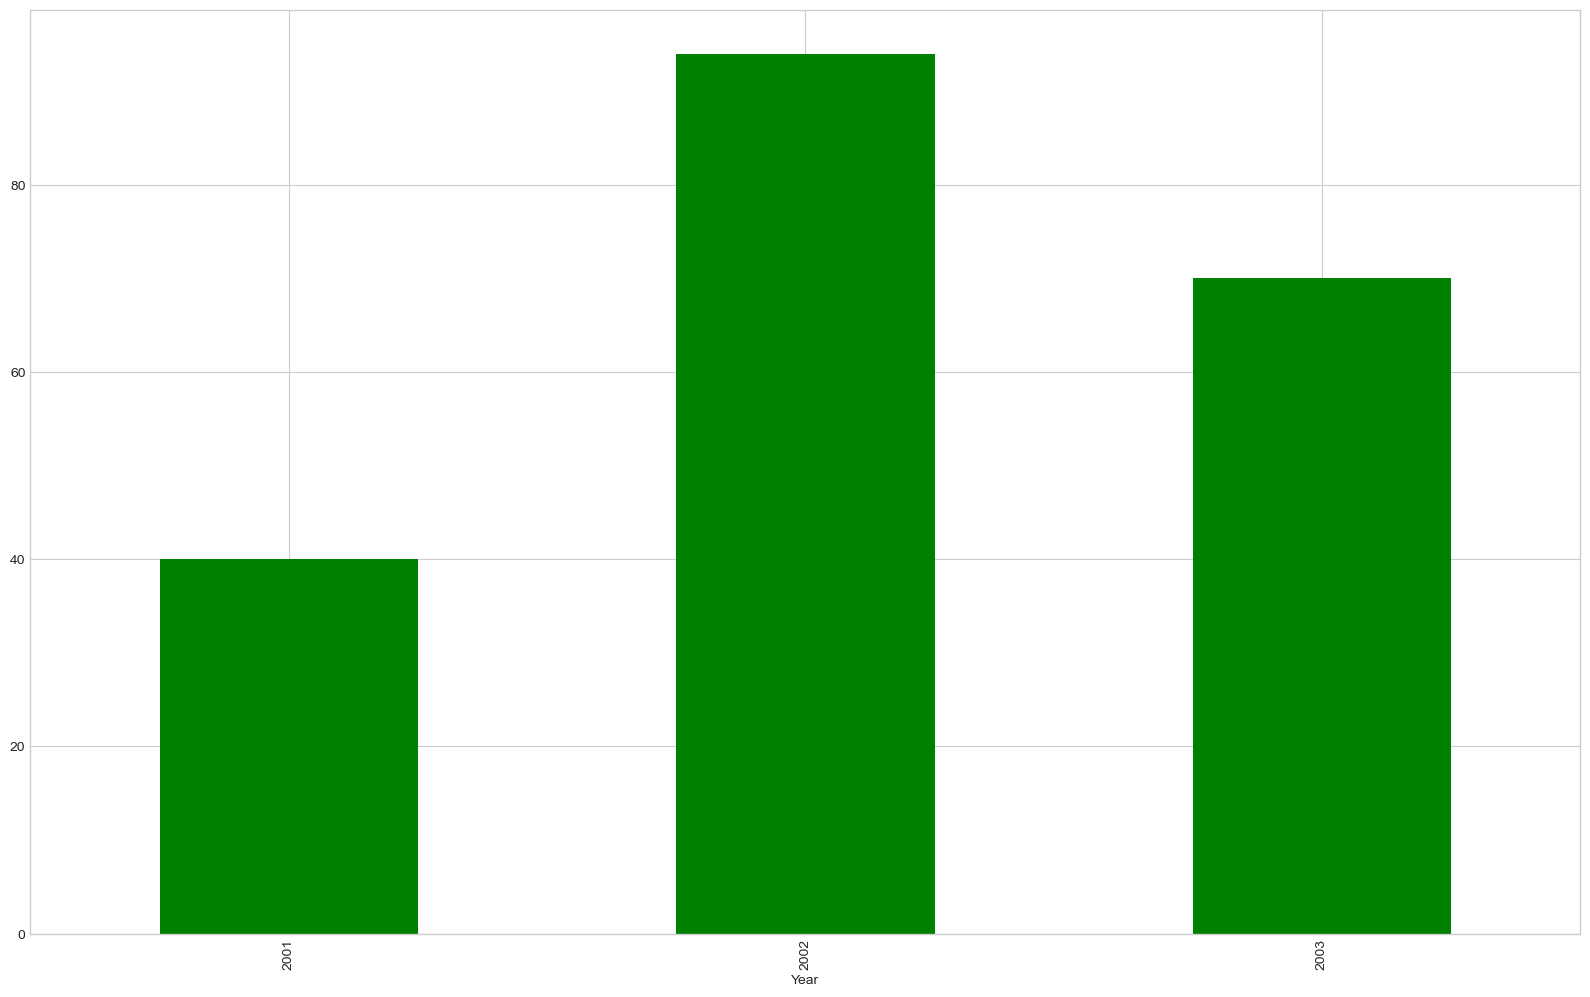

In [61]:
df.loc[df['State']=='SC'].set_index('Year')['YieldPerCol'].plot(
    kind='bar',
    color='green')

<AxesSubplot:xlabel='Year'>

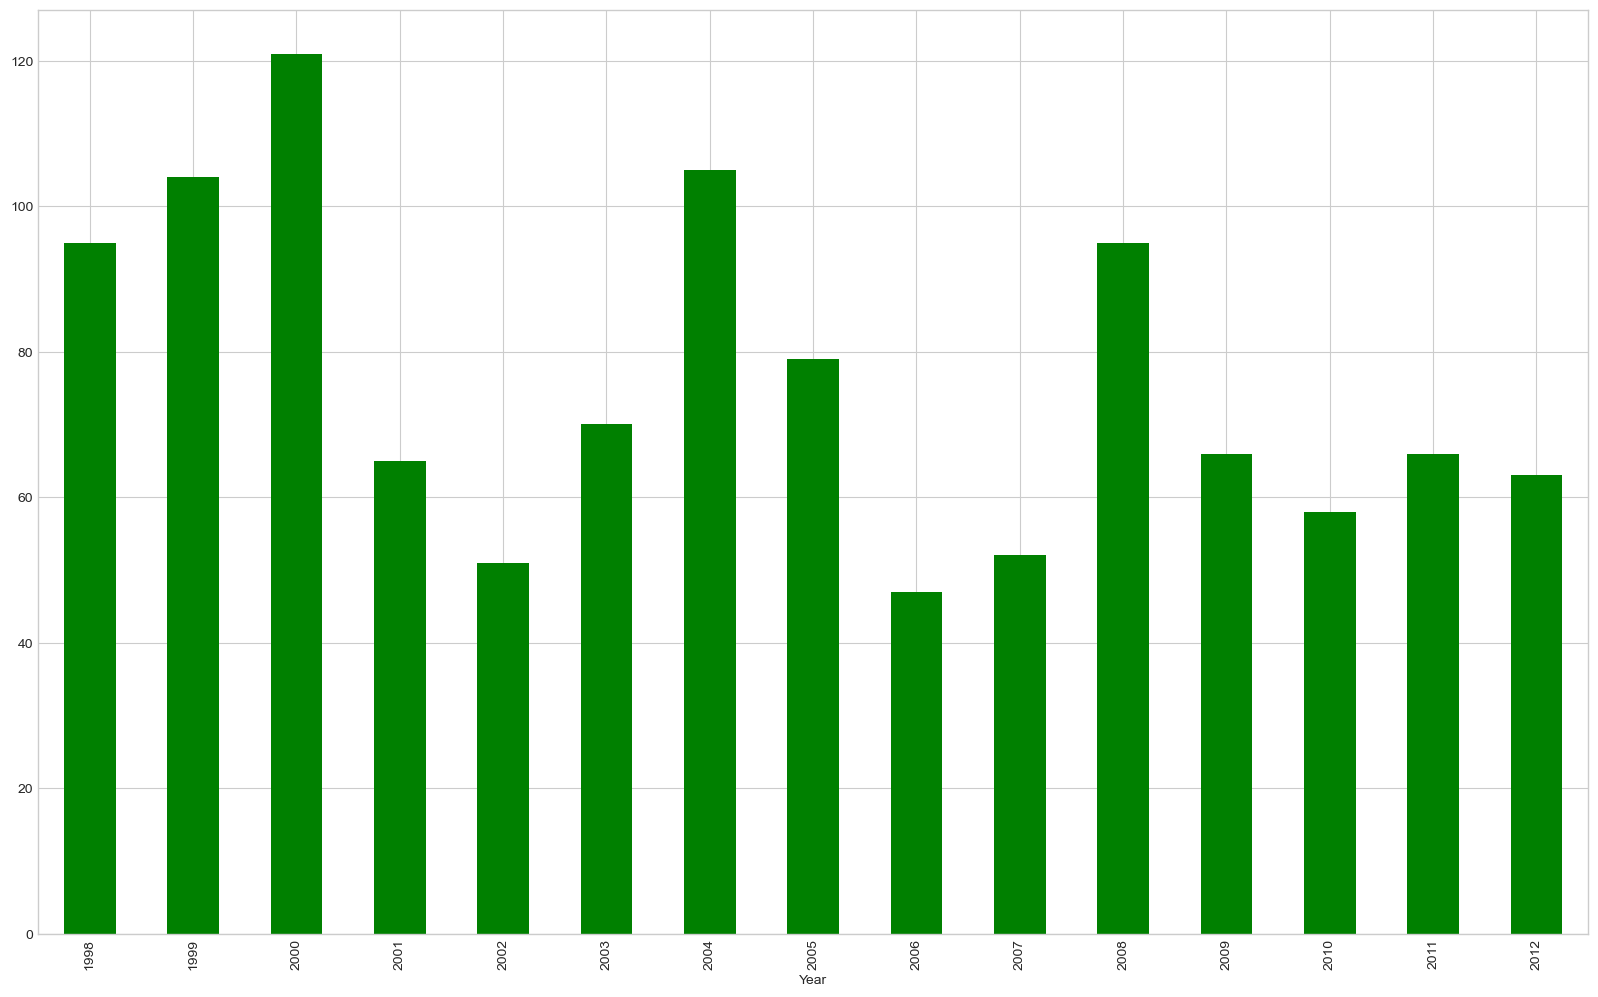

In [63]:
df.loc[df['State']=='SD'].set_index('Year')['YieldPerCol'].plot(
    kind='bar',
    color='green')

In [66]:
df

,State,NumCol,YieldPerCol,TotalProd,Stocks,PricePerIb,ProdValue,Year
0,AL,16000,71.0,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000,60.0,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000,65.0,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000,83.0,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000,72.0,1944000.0,1594000.0,0.70,1361000.0,1998
...,...,...,...,...,...,...,...,...
621,VA,4000,41.0,164000.0,23000.0,3.77,618000.0,2012
622,WA,62000,41.0,2542000.0,1017000.0,2.38,6050000.0,2012
623,WV,6000,48.0,288000.0,95000.0,2.91,838000.0,2012
624,WI,60000,69.0,4140000.0,1863000.0,2.05,8487000.0,2012


In [74]:
df.groupby('State')['Year'].count()\
    .to_frame()\
        .sort_values('Year')

,Year
State,
SC,3
MD,6
OK,6
NV,11
AL,15
NE,15
NJ,15
NM,15
NY,15


In [77]:
df_mean.reset_index(inplace=True)

In [90]:
df_std.reset_index(inplace=True)

In [85]:
# Dropping States with less Years
df_mean=df_mean.loc[(df_mean['State']!='SC') &
            (df_mean['State']!='MD') & 
            (df_mean['State']!='OK') ]

In [92]:
# Dropping States with less Years
df_std=df_std.loc[(df_std['State']!='SC') &
            (df_std['State']!='MD') & 
            (df_std['State']!='OK') ]

In [93]:
df_std.head(2)

,State,YieldPerCol
0,AL,12.591758
1,AR,13.365556


In [94]:
df_mean.head(2)

,State,YieldPerCol
0,AL,67.533333
1,AR,73.933333


In [ ]:
# groupby('ddd').arg(mean,std)

In [100]:
df_mean.rename(columns={'YieldPerCol': 'MeanYield'})

,State,MeanYield
0,AL,67.533333
1,AR,73.933333
2,AZ,60.066667
3,CA,55.800000
4,CO,62.800000
5,FL,83.066667
6,GA,54.666667
7,HI,98.000000
8,IA,65.733333
9,ID,44.000000


In [102]:
df_ms=pd.merge(
    df_mean.rename(columns={'YieldPerCol': 'MeanYield'}),
    df_std.rename(columns={'YieldPerCol': 'StdYield'}),
    on='State'
)

In [103]:
df_ms

,State,MeanYield,StdYield
0,AL,67.533333,12.591758
1,AR,73.933333,13.365556
2,AZ,60.066667,8.189424
3,CA,55.800000,14.775462
4,CO,62.800000,12.672806
5,FL,83.066667,15.275876
6,GA,54.666667,9.514400
7,HI,98.000000,19.845834
8,IA,65.733333,13.068319
9,ID,44.000000,9.157355


# Standardazing Feature

**Mean and STD of Yield is the same unit. That is why we are not goin to standardize them.**

# Unsupervised Machine Learning - K Means

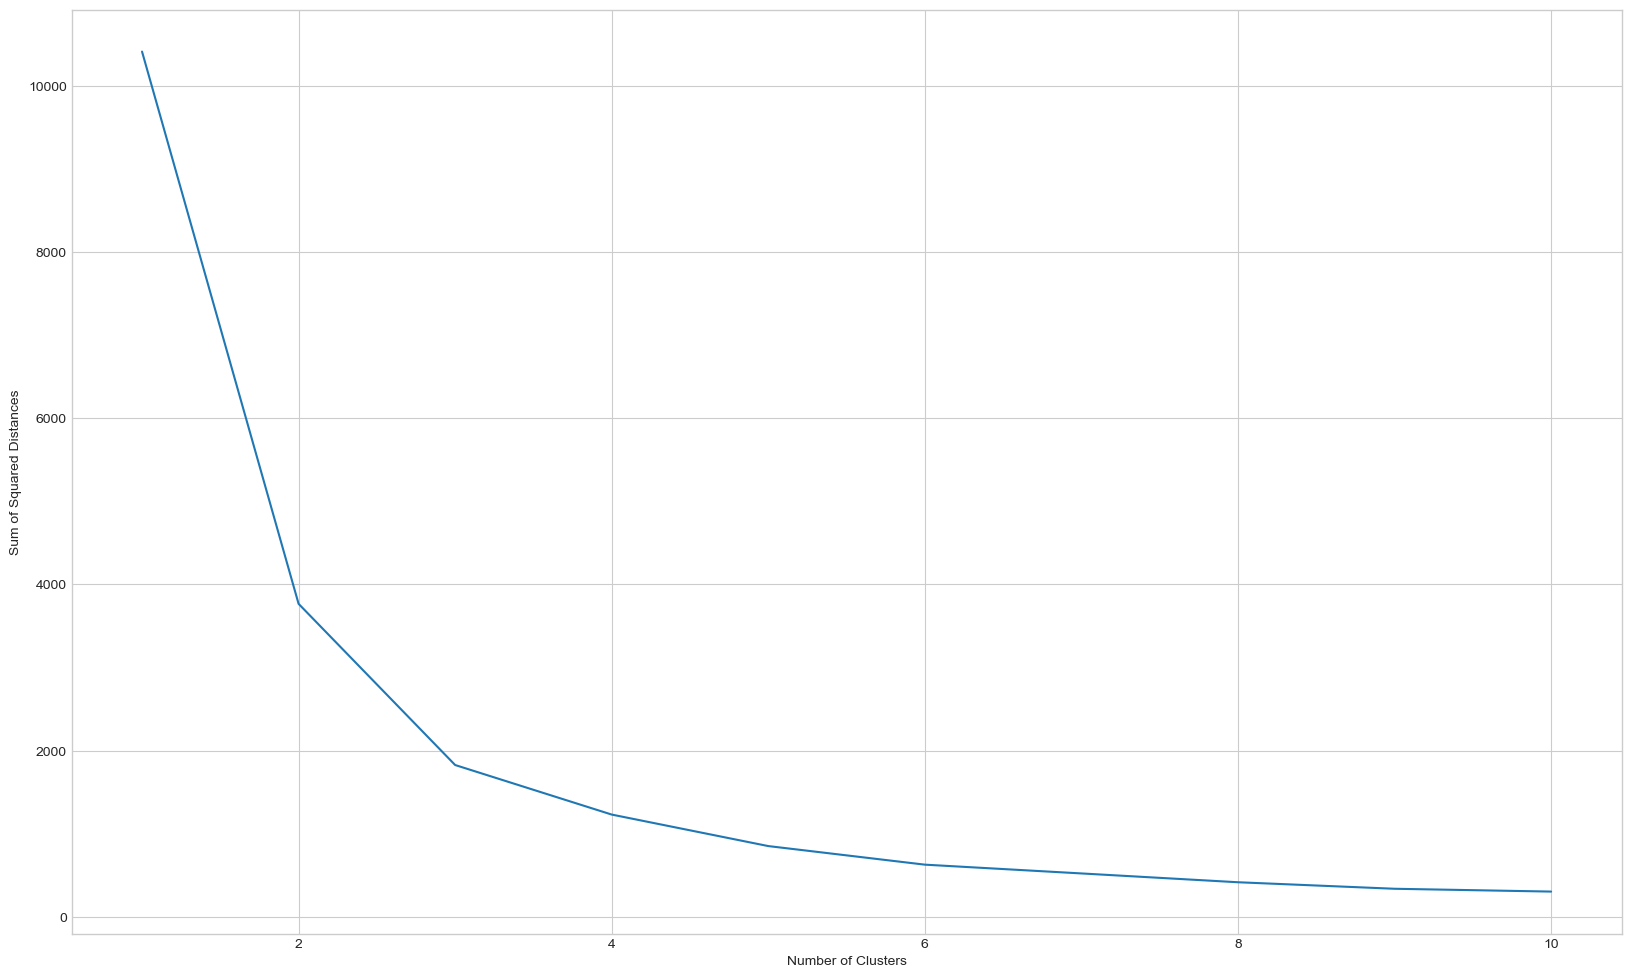

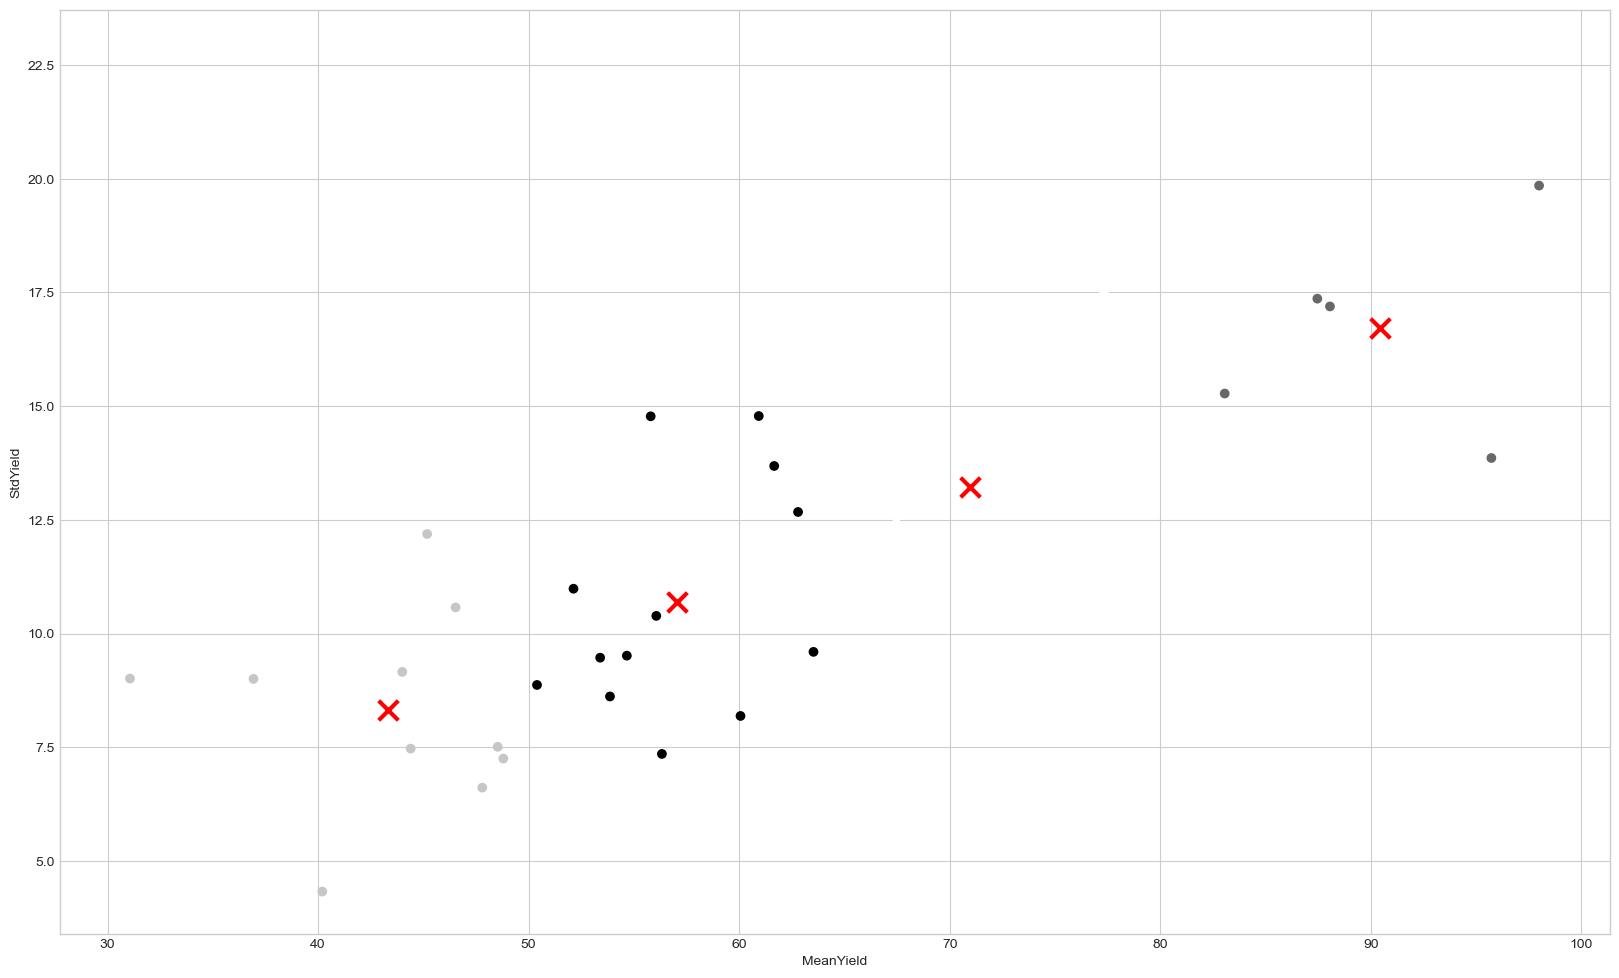

In [106]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
df=df_ms.copy()

# Define the features to be used for clustering
X = df[['MeanYield', 'StdYield']]

# Elbow method to determine the optimal number of clusters
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

# Plot the elbow graph
plt.plot(range(1, 11), sse)
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances')
plt.show()

# Fit the KMeans model with the optimal number of clusters
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

# Predict the cluster labels for each data point
labels = kmeans.predict(X)

# Plot the data points and cluster centers
plt.scatter(X['MeanYield'], X['StdYield'], c=labels)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=200, linewidths=3, color='r')
plt.xlabel('MeanYield')
plt.ylabel('StdYield')
plt.show()


In [108]:
labels

array([0, 0, 3, 3, 3, 2, 3, 2, 0, 1, 3, 3, 3, 3, 2, 1, 0, 0, 3, 2, 0, 1,
       2, 0, 1, 3, 1, 0, 3, 1, 3, 0, 3, 0, 1, 1, 0, 1, 0, 1, 0],
      dtype=int32)

In [110]:
df_ms['Labels']=labels

In [113]:
df_ms.groupby('Labels').mean()\
    .sort_values('MeanYield')

,MeanYield,StdYield
Labels,,
1,43.344848,8.311492
3,57.051282,10.684890
0,70.948718,13.212814
2,90.466667,16.706329


In [131]:
df_ms.replace(to_replace={
    1:3,
    3:2,
    0:1,
    2:0}, inplace=True
)

In [132]:
pd.merge(
    gdf[['State', 'geometry']],
    df_ms,
    on='State'
    ).explore(
        column='Labels', # column you want to visualize
        cmap='Blues', # color on the map
        k=4, # number of colors. We have 4 clusters
        scheme='naturalbreaks', #How your legened will look like
        tiles='Stamen Terrain', # map background type
        tooltip=['State', 'MeanYield', 'Labels'] # what to show when you hover around your mouse
    )